In [13]:
#Untuk mencari vz dan vy

import numpy as np
import matplotlib.pyplot as plt

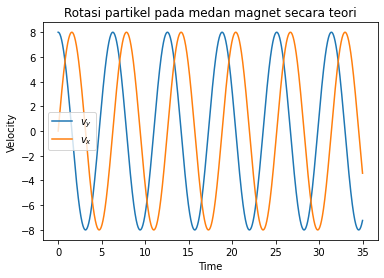

In [20]:
t=np.arange(0, 35, 0.002) #(awal, akhir, step kenaikan)

plt.figure()
plt.plot(t, 8*np.cos(t), t, 8*np.sin(t))
plt.title('Rotasi partikel pada medan magnet secara teori')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend(['$v_y$', '$v_x$'])

plt.show()

In [18]:
def rungekuta4(f,t, x, y, h):
    k0 = h*f(t,x, y)
    k1 = h*f(t+h/2, x+k0/2, y)
    k2 = h*f(t+h/2, x+k1/2, y)
    k3 = h*f(t+h, x+k2,y)
    return (k0 + 2*k1 + 2*k2 + k3)/6

#memasukkan persamaan diferensial terkopel
def vx_dot(t,vx,vy,q=1, Bz=3, m=3):
    return -q*Bz*vy/m

def vy_dot(t,vy,vx,q=1, Bz=3, m=3):
    return q*Bz*vx/m

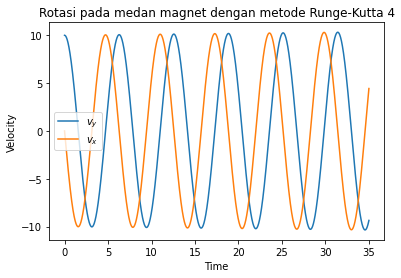

In [22]:
#Initial Condition
vx_awal = 0 #kecepatan tangensial dari rotasi
vy_awal = 10 
t_awal = 0
t_stop = 35
h = 0.002

vxs=[vx_awal]
vys=[vy_awal]
ts=[t_awal]

#Iterasi metode runge-kutta
while ts[-1] < t_stop:
    h = min(h, t_stop - ts[-1])
    vx = vxs[-1] + rungekuta4(vx_dot,ts[-1],vxs[-1],vys[-1],h)
    vy = vys[-1] + rungekuta4(vy_dot,ts[-1],vys[-1],vxs[-1],h)
    t = ts[-1] + h
    ts.append(t)
    vxs.append(vx)
    vys.append(vy)

#plot kecepatan pada arah x dan y tiap waktu
plt.figure()
plt.plot(ts,vys,ts,vxs)
plt.title('Rotasi pada medan magnet dengan metode Runge-Kutta 4')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend(['$v_y$', '$v_x$'])

plt.show()